In [ ]:
#Task1

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('happines_corruption.csv')
df.head()

Country  happiness_score  gdp_per_capita    family    health   freedom  \
0       Norway            7.537        1.616463  1.533524  0.796667  0.635423   
1      Denmark            7.522        1.482383  1.551122  0.792566  0.626007   
2      Iceland            7.504        1.480633  1.610574  0.833552  0.627163   
3  Switzerland            7.494        1.564980  1.516912  0.858131  0.620071   
4      Finland            7.469        1.443572  1.540247  0.809158  0.617951   

   generosity  government_trust  dystopia_residual continent  Year  \
0    0.362012          0.315964           2.277027    Europe  2015   
1    0.355280          0.400770           2.313707    Europe  2015   
2    0.475540          0.153527           2.322715    Europe  2015   
3    0.290549          0.367007           2.276716    Europe  2015   
4    0.245483          0.382612           2.430182    Europe  2015   

   social_support  cpi_score  
0             0.0         88  
1             0.0         91  
2             0.0         79  
3             0.0         86  
4             0.0         90

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [4]:
df.describe()

happiness_score  gdp_per_capita      family      health     freedom  \
count       792.000000      792.000000  792.000000  792.000000  792.000000   
mean          5.473310        0.929217    0.504998    0.648691    0.427016   
std           1.124726        0.385774    0.552736    0.232261    0.148003   
min           2.566900        0.000000    0.000000    0.000000    0.000000   
25%           4.590750        0.644242    0.000000    0.510070    0.325433   
50%           5.485500        0.994544    0.000000    0.685397    0.439621   
75%           6.300500        1.228677    1.040410    0.815641    0.546280   
max           7.808700        2.096000    1.610574    1.141000    0.724000   

       generosity  government_trust  dystopia_residual         Year  \
count  792.000000        792.000000         792.000000   792.000000   
mean     0.212440          0.125720           1.379277  2017.500000   
std      0.121660          0.109032           1.075276     1.708904   
min      0.000000          0.000000           0.000000  2015.000000   
25%      0.125784          0.052862           0.000000  2016.000000   
50%      0.197000          0.089000           1.731948  2017.500000   
75%      0.273250          0.154250           2.236894  2019.000000   
max      0.838075          0.551910           3.602140  2020.000000   

       social_support   cpi_score  
count      792.000000  792.000000  
mean         0.609302   44.327020  
std          0.640754   19.508833  
min          0.000000   11.000000  
25%          0.000000   30.000000  
50%          0.176214   38.000000  
75%          1.268250   57.000000  
max          1.644000   91.000000

In [42]:
happiest_row = df.loc[df['happiness_score'].idxmax()]
happiest_row['Country'], happiest_row['Year'], happiest_row['happiness_score']

('Finland', np.int64(2020), np.float64(0.0), np.float64(7.808700085))

In [6]:
unhappiest_row = df.loc[df['happiness_score'].idxmin()]
unhappiest_row['Country'], unhappiest_row['Year'], unhappiest_row['happiness_score']

('Afghanistan', np.int64(2020), np.float64(2.566900015))

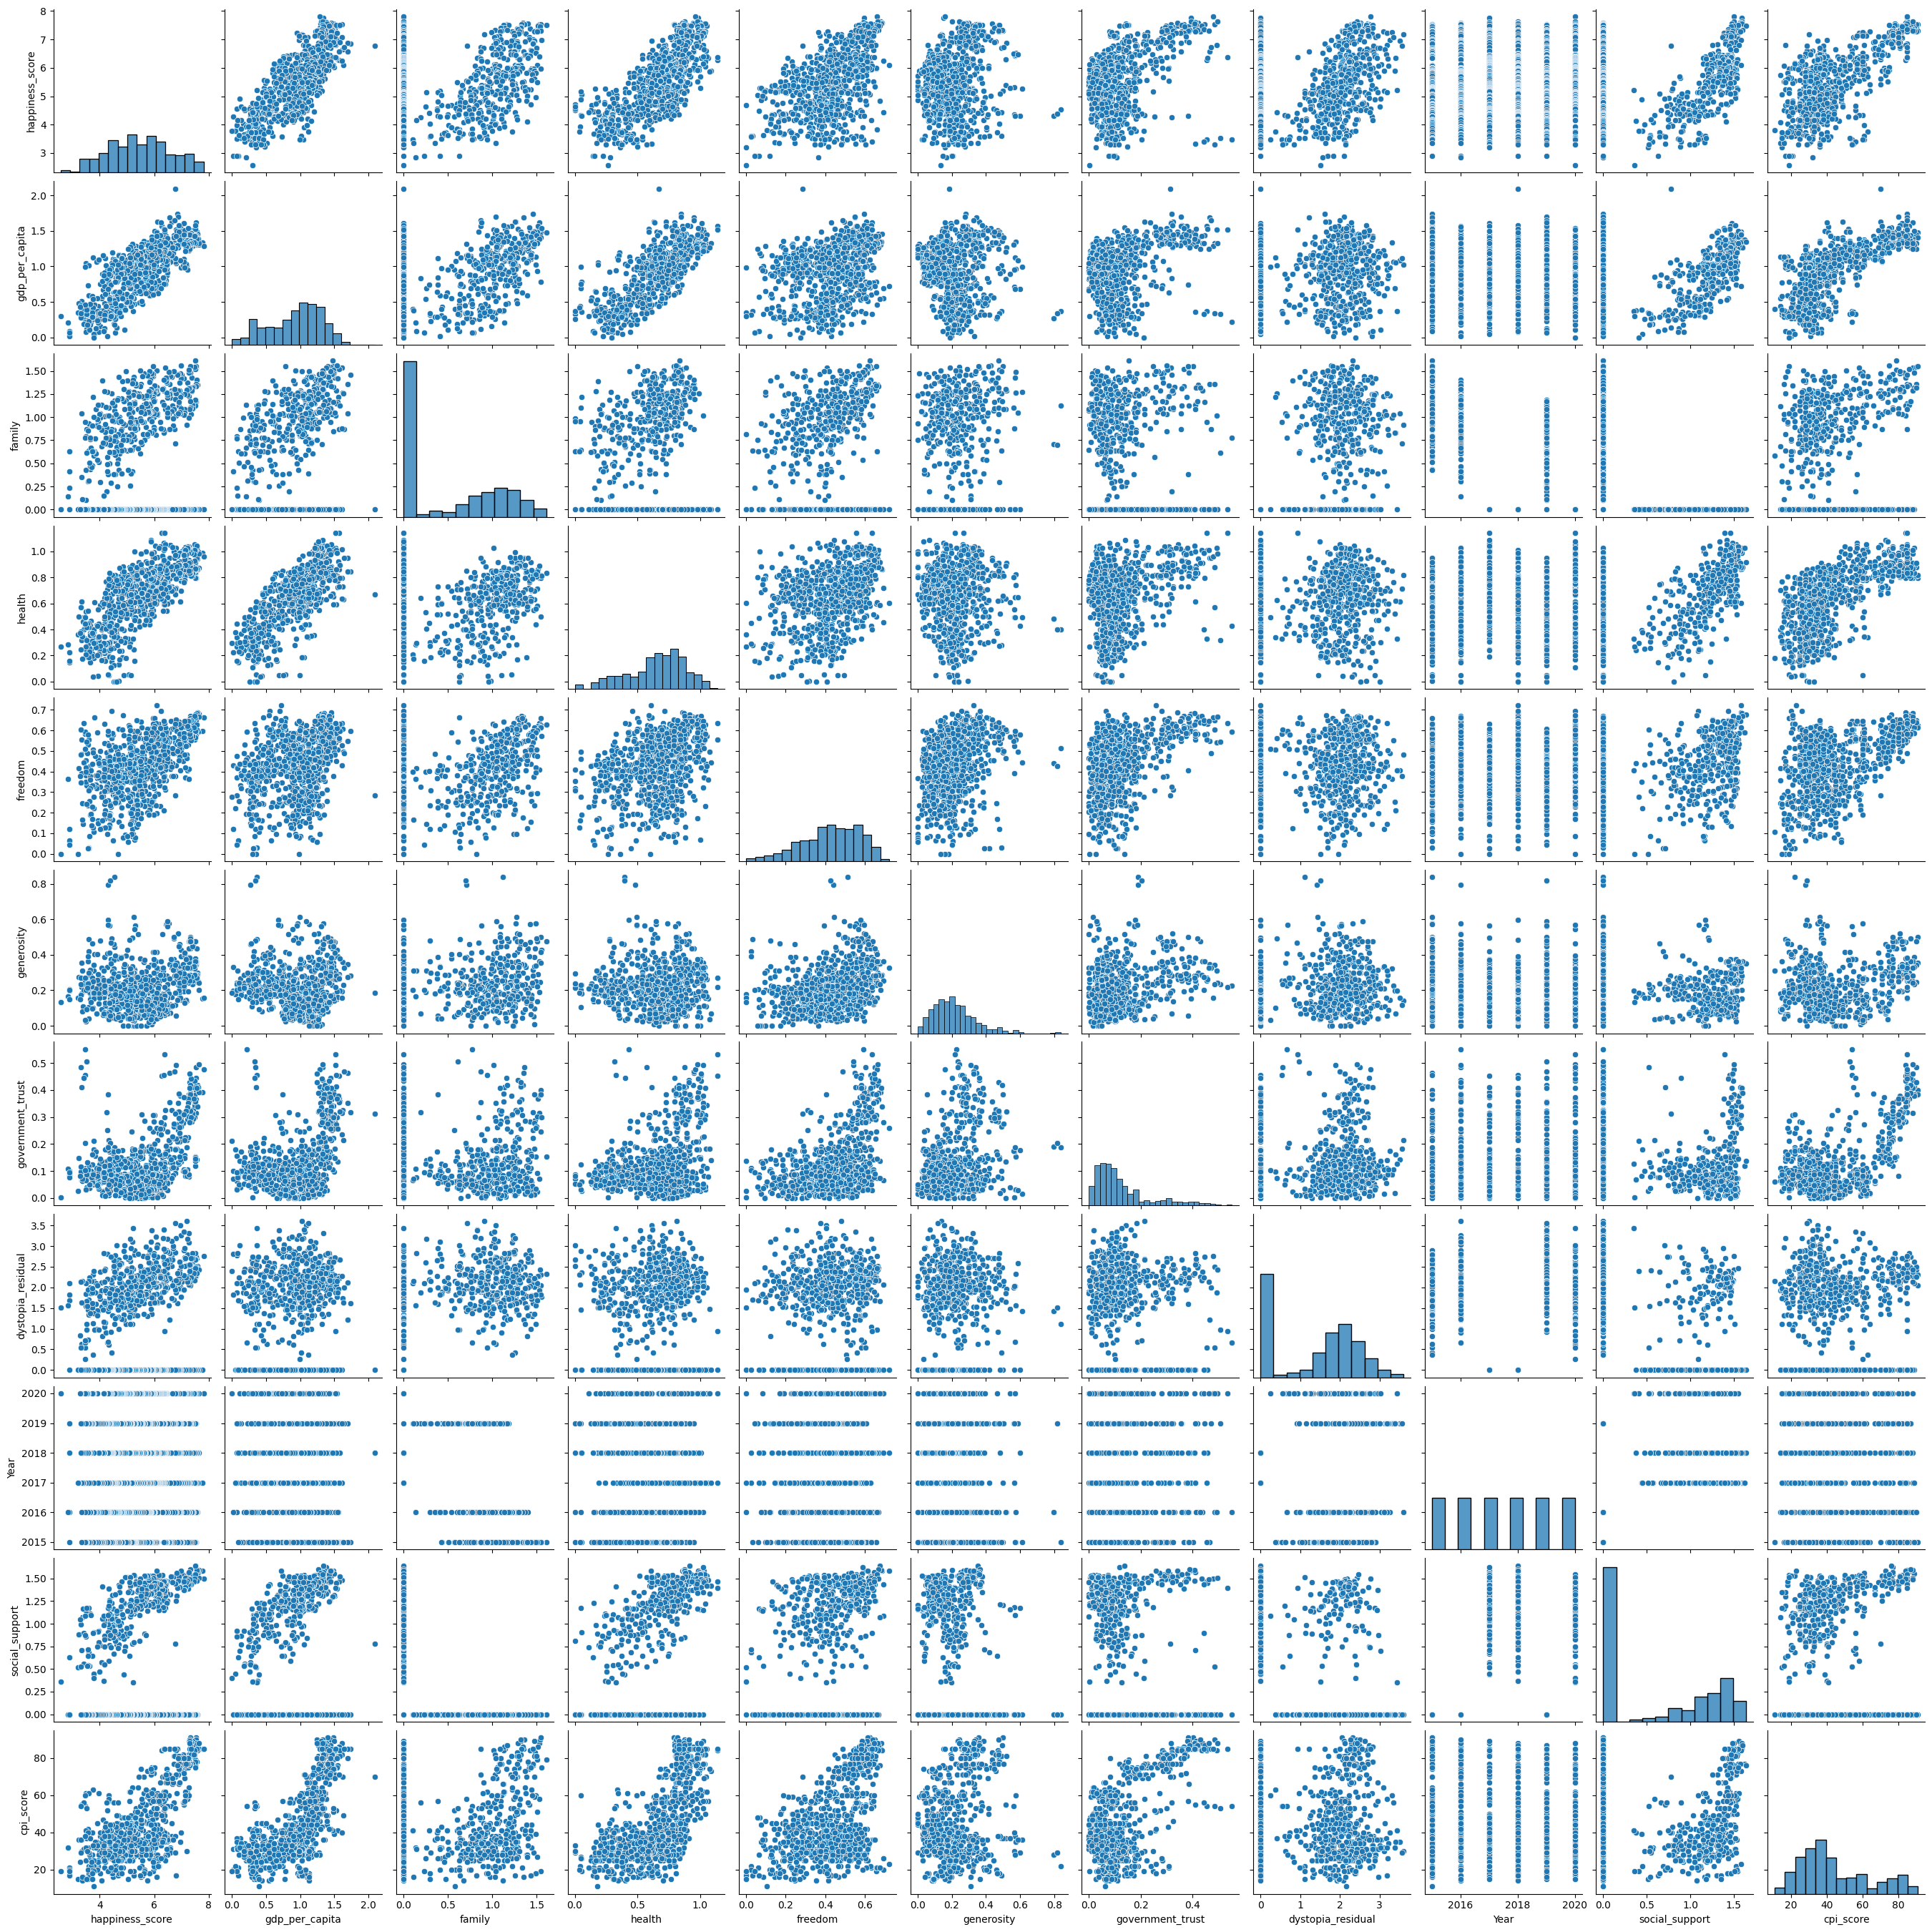

In [8]:
sns.pairplot(df)

In [9]:
# At first the graphs show that happiness is linearly influenced by gdp_per_capita, family, health, social_support and cpi_score.
# But we shoud check it.

In [11]:
#Is there a correlation between the corruption perceptions index and the level of happiness?

<Axes: xlabel='cpi_score', ylabel='happiness_score'>

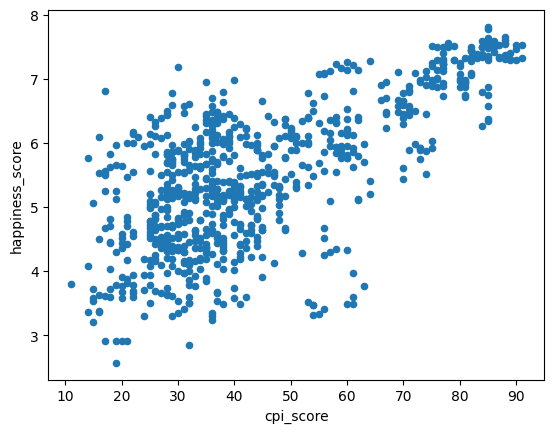

In [12]:
df.plot(kind='scatter', x='cpi_score', y='happiness_score')

In [18]:
import matplotlib.pyplot as plt2
import scipy.stats as stats

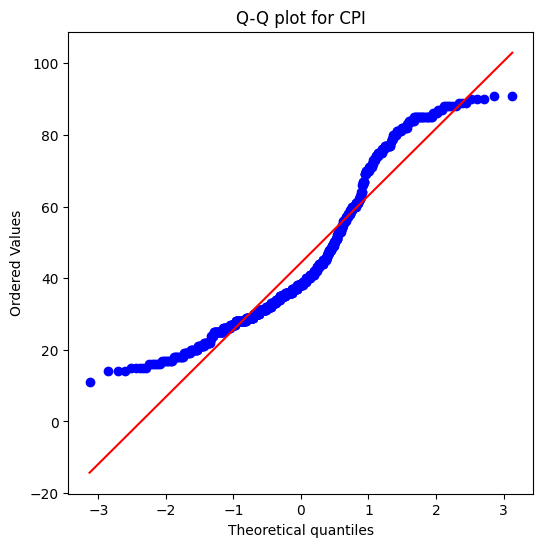

In [24]:
#Ð¡heck the normality of the data distribution:
plt2.figure(figsize=(6, 6))
stats.probplot(df['cpi_score'], dist="norm", plot=plt2)
plt2.title('Q-Q plot for CPI')
plt2.show()

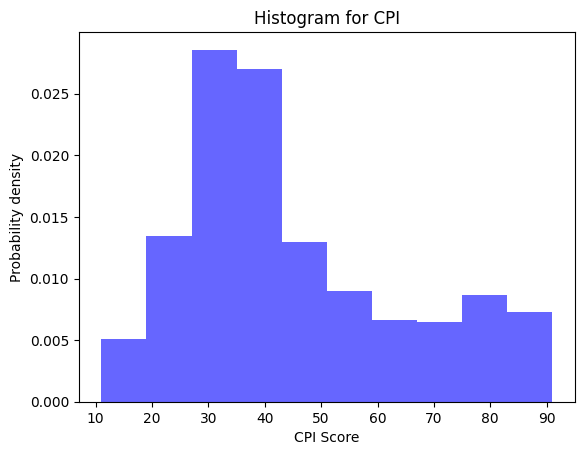

In [25]:
plt2.hist(df['cpi_score'], bins=10, density=True, alpha=0.6, color='b')
plt2.title('Histogram for CPI')
plt2.xlabel('CPI Score') 
plt2.ylabel('Probability density')
plt2.show()

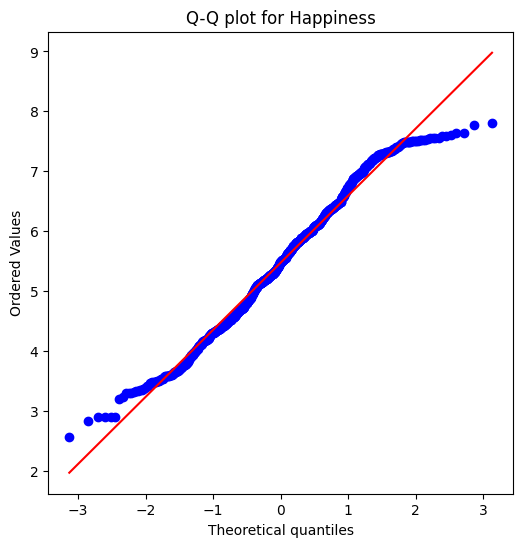

In [27]:
plt2.figure(figsize=(6, 6))
stats.probplot(df['happiness_score'], dist="norm", plot=plt2)
plt2.title('Q-Q plot for Happiness')
plt2.show()

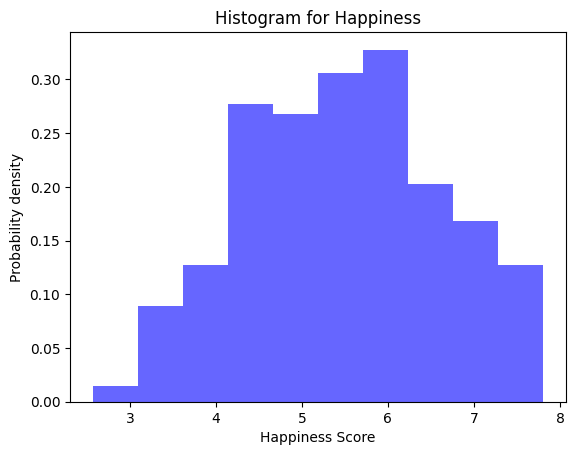

In [28]:
plt2.hist(df['happiness_score'], bins=10, density=True, alpha=0.6, color='b')
plt2.title('Histogram for Happiness')
plt2.xlabel('Happiness Score') 
plt2.ylabel('Probability density')
plt2.show()

In [ ]:
#calculate Spearman's correlation coefficient:

In [29]:
df[['happiness_score', 'cpi_score']].corr(method='spearman')

happiness_score  cpi_score
happiness_score         1.000000   0.622027
cpi_score               0.622027   1.000000

In [ ]:
#calculate the Kendall correlation coefficient:

In [30]:
df[['happiness_score', 'cpi_score']].corr(method='kendall')

happiness_score  cpi_score
happiness_score         1.000000   0.460575
cpi_score               0.460575   1.000000

In [35]:
df_new = df.drop(['Country', 'continent', 'Year'], axis=1)

In [37]:
df_new.corr(method='spearman')

happiness_score  gdp_per_capita    family    health  \
happiness_score           1.000000        0.796952  0.139737  0.765699   
gdp_per_capita            0.796952        1.000000  0.215922  0.770263   
family                    0.139737        0.215922  1.000000 -0.074117   
health                    0.765699        0.770263 -0.074117  1.000000   
freedom                   0.549513        0.360422  0.006478  0.415357   
generosity                0.138579       -0.002301  0.227875 -0.019394   
government_trust          0.351135        0.287957  0.102359  0.210789   
dystopia_residual         0.233622        0.064533  0.557576 -0.045528   
social_support            0.239110        0.142498 -0.855444  0.387623   
cpi_score                 0.622027        0.735174  0.113448  0.685520   

                    freedom  generosity  government_trust  dystopia_residual  \
happiness_score    0.549513    0.138579          0.351135           0.233622   
gdp_per_capita     0.360422   -0.002301          0.287957           0.064533   
family             0.006478    0.227875          0.102359           0.557576   
health             0.415357   -0.019394          0.210789          -0.045528   
freedom            1.000000    0.339178          0.441906           0.003327   
generosity         0.339178    1.000000          0.234489           0.160056   
government_trust   0.441906    0.234489          1.000000           0.137310   
dystopia_residual  0.003327    0.160056          0.137310           1.000000   
social_support     0.236287   -0.182996         -0.010907          -0.594248   
cpi_score          0.422193    0.065831          0.333023           0.042921   

                   social_support  cpi_score  
happiness_score          0.239110   0.622027  
gdp_per_capita           0.142498   0.735174  
family                  -0.855444   0.113448  
health                   0.387623   0.685520  
freedom                  0.236287   0.422193  
generosity              -0.182996   0.065831  
government_trust        -0.010907   0.333023  
dystopia_residual       -0.594248   0.042921  
social_support           1.000000   0.147637  
cpi_score                0.147637   1.000000

<Axes: >

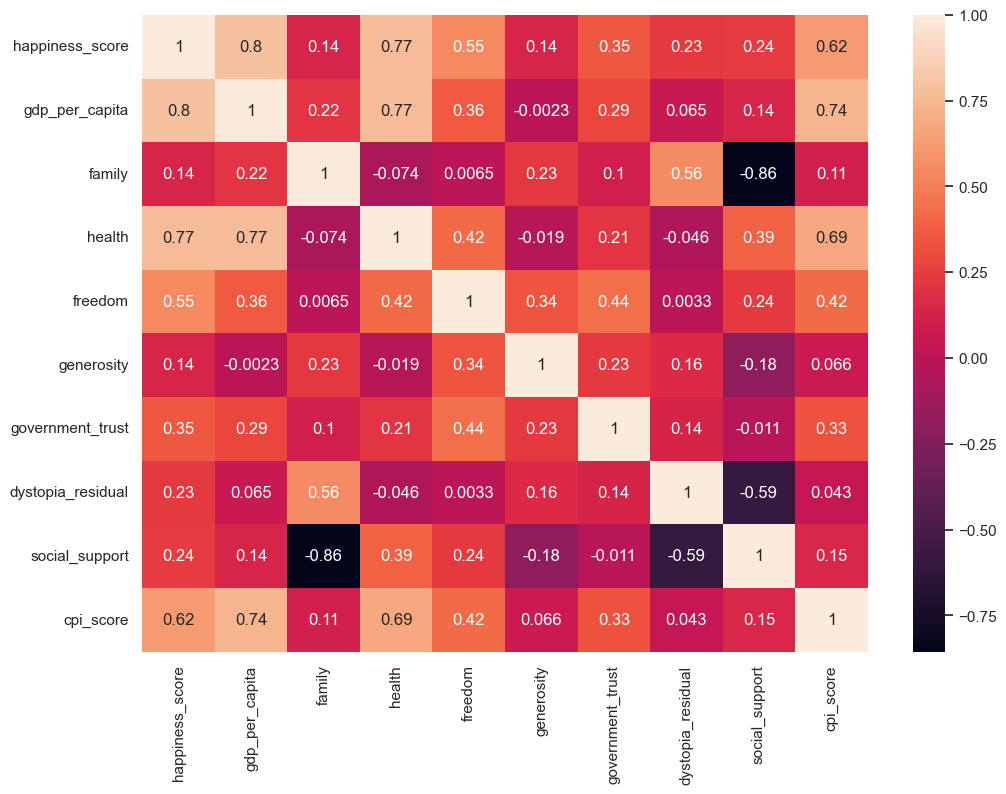

In [38]:
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(df_new.corr(method='spearman'), annot=True)

In [ ]:
#Between the corruption perceptions index and the level of happiness are moderate positive correlation is 0.62.
#CPI (Corruption Perception Index) is an index of corruption perception published by Transparency International. It reflects the perception of the level of corruption in the public sector of different countries. Countries are scored from 0 (very high level of corruption) to 100 (absence of corruption). 
#This means that the higher the CPI, the higher level of happiness in the country.

In [ ]:
#Is there a correlation between the level of trust in the government and the level of happiness?

<Axes: xlabel='government_trust', ylabel='happiness_score'>

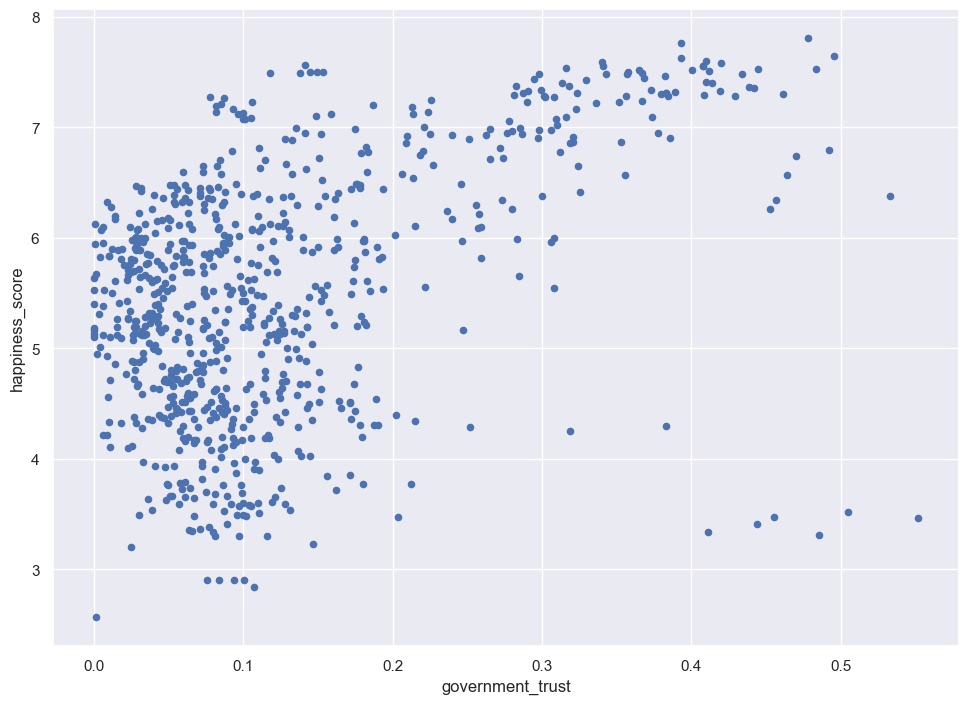

In [43]:
df.plot(kind='scatter', x='government_trust', y='happiness_score')

In [ ]:
#Between level of trust in the government and the level of happiness are less and but the same moderate positive correlation is 0.35.
#This means that the higher level of trust in the government, the higher level of happiness in the country.

In [ ]:
#Task2